In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('employees.csv')

In [ ]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [ ]:
#number of projects
#avg monthly hours
df.rename(columns={'timeSpent.company':'yearSpentincompany'},inplace=True)



In [ ]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,yearSpentincompany,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [ ]:
df['workAccident'].value_counts()

0    12830
1     2169
Name: workAccident, dtype: int64

In [ ]:
df['workAccident'].unique()

array([0, 1])

In [ ]:
df['promotionInLast5years'].unique()

array([0, 1])

In [ ]:
df['left'].unique()

array([1, 0])

In [ ]:
df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [ ]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

##DataSet introductory commands

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   yearSpentincompany     14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
yearSpentincompany       0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

checking duplicate values

In [ ]:
df.duplicated().sum()  #if all the parameters in these duplicate values are same then it is considered as duplicates

3008

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(11991, 10)

Detailed Analysis

<Axes: xlabel='lastEvaluation', ylabel='Count'>

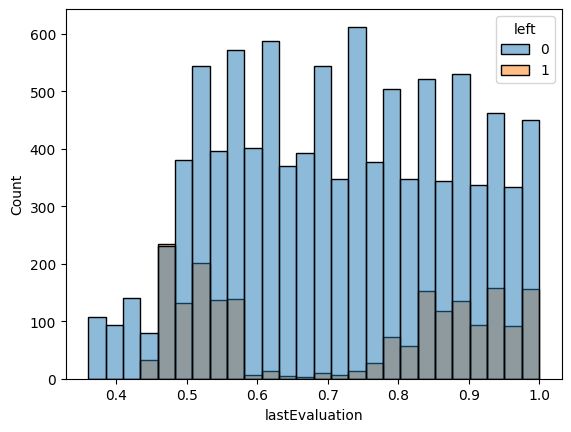

In [ ]:
#satisfactory level
#Not relavant
#don't spend too much time in useless columns
#we cant trust satisfactory level
sns.histplot(data=df,x=df['lastEvaluation'],hue=df['left'])
#45% to 55% are having high attrition 80% to 100% are also having attrintion low scoring as well as high scoring

Low scoring people and very high scoring people are leaving the company
Very high scoring people leaving the company is a great concern and this should be addressed .

In [ ]:
#number of projects

In [ ]:
df['numberOfProjects'].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: numberOfProjects, dtype: int64

<Axes: xlabel='numberOfProjects', ylabel='count'>

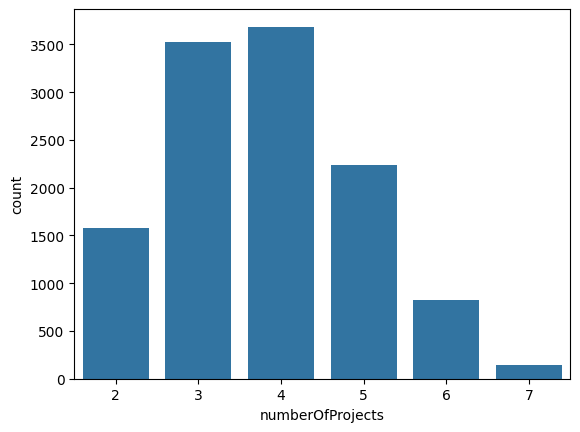

In [ ]:
sns.countplot(data=df,x=df['numberOfProjects'])

<Axes: xlabel='numberOfProjects', ylabel='count'>

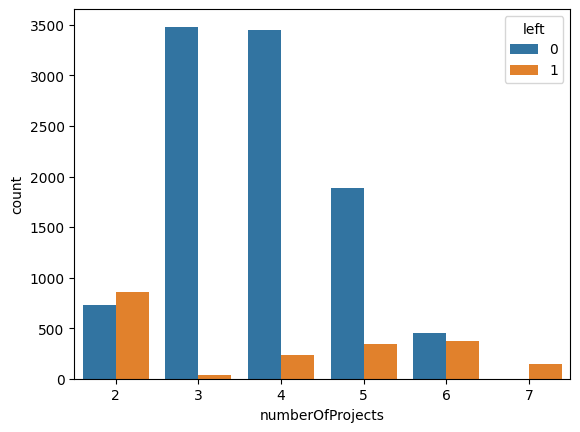

In [ ]:
sns.countplot(data=df,x=df['numberOfProjects'],hue=df['left'])

###1) number of projects completed is an important factor when it comes to attrition
### 2)people who have completed 2 projects are leaving the company
#### they might be felt ignored
#### 3)people who have completed 6 or 7 projects.They might have been overwhelmed by the work or they have found better opportunities.






In [ ]:
df['yearSpentincompany'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: yearSpentincompany, dtype: int64

<Axes: xlabel='yearSpentincompany', ylabel='count'>

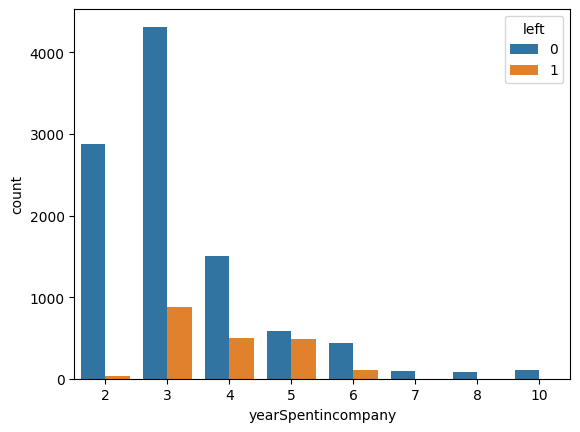

In [ ]:
sns.countplot(data=df,x=df['yearSpentincompany'],hue=df['left'])



*  People with higher managment experience 7,8,10 years of experience  are not leaving the company which is a good sign
*   People with 3,4,5 years of experience are having high attirition rate,which is a matter of concern.



In [ ]:
df['workAccident'].value_counts()

0    10141
1     1850
Name: workAccident, dtype: int64

<Axes: xlabel='workAccident', ylabel='count'>

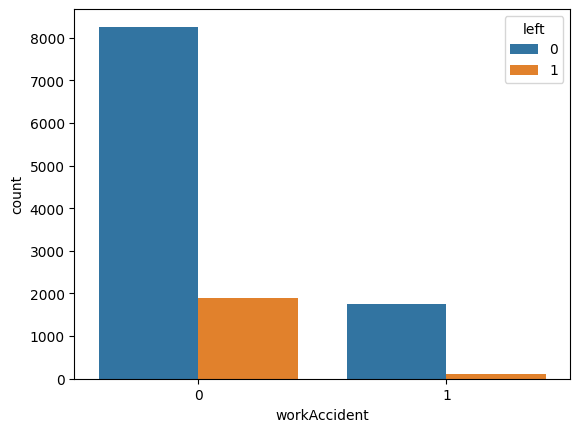

In [ ]:
sns.countplot(data=df,x=df['workAccident'],hue=df['left'])

## Very less people have experienced a work accident
##Work accidents are not playing any role in company high attrition rates
## company is handling work accidents very well

Text(0, 0.5, 'Count of people')

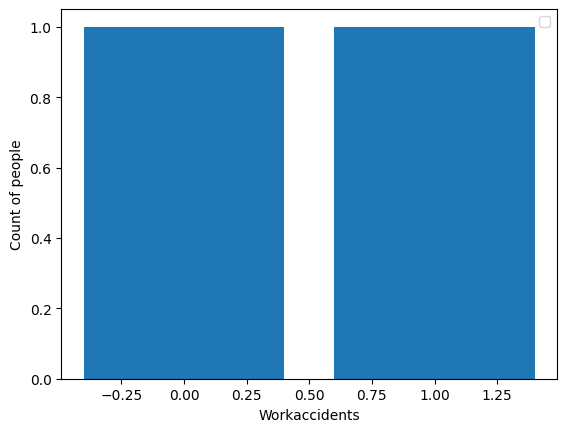

In [ ]:
df['promotionInLast5years'].value_counts()

0    11788
1      203
Name: promotionInLast5years, dtype: int64

In [ ]:
(203/(11788+203))*100                               #PERCETANCGE OF PEOPLE WHO HAVE GOT PROMOTION

1.6929363689433743

<Axes: xlabel='promotionInLast5years', ylabel='count'>

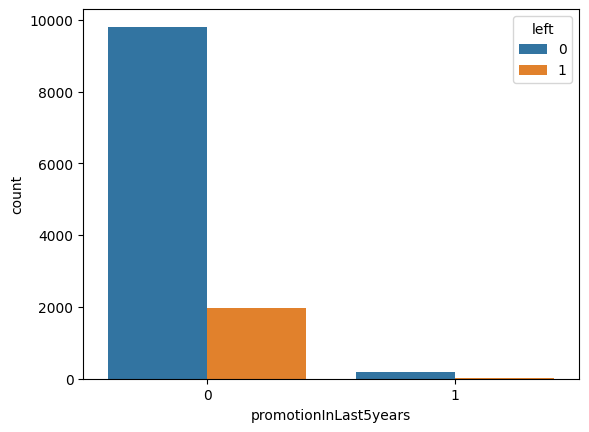

In [ ]:
sns.countplot(data=df, x=df['promotionInLast5years'],hue='left')

Very less people have got promotion ,1.69% of people have got the promotion
People who have not got the promotion are leaving the company




In [ ]:
df['dept'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: dept, dtype: int64

<Axes: xlabel='dept', ylabel='count'>

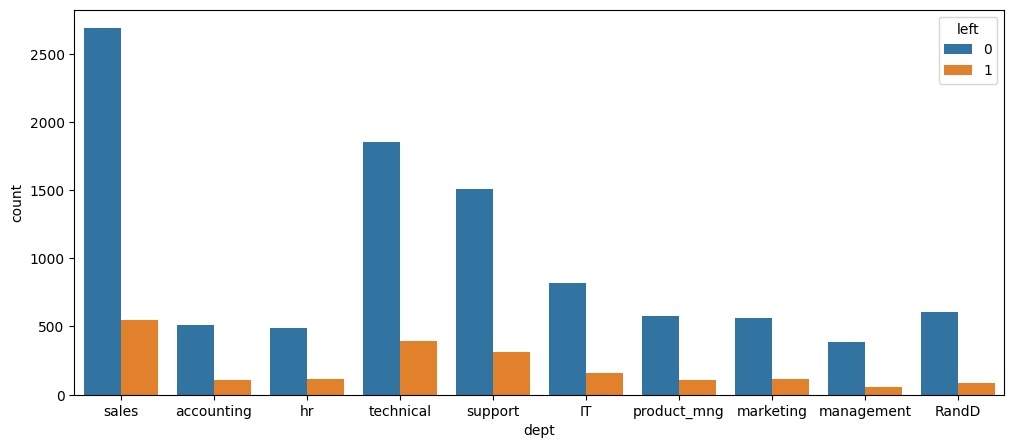

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x=df['dept'],hue=df['left'])

In [ ]:
round(len(df[(df['dept']=='sales') & (df['left']==1)])/len(df[df['dept']=='sales'])*100,2)

16.98

In [ ]:
#16.98 % attrition rate in sales

In [ ]:
df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [ ]:
for col in df['dept'].unique():
  print('Attrition rate for',col,'Department is:')
  print(round(len(df[(df['dept']==col) & (df['left']==1)])/len(df[df['dept']==col])*100,2))
  print("---------------------------------------")

Attrition rate for sales Department is:
16.98
---------------------------------------
Attrition rate for accounting Department is:
17.55
---------------------------------------
Attrition rate for hr Department is:
18.8
---------------------------------------
Attrition rate for technical Department is:
17.38
---------------------------------------
Attrition rate for support Department is:
17.13
---------------------------------------
Attrition rate for IT Department is:
16.19
---------------------------------------
Attrition rate for product_mng Department is:
16.03
---------------------------------------
Attrition rate for marketing Department is:
16.64
---------------------------------------
Attrition rate for management Department is:
11.93
---------------------------------------
Attrition rate for RandD Department is:
12.25
---------------------------------------


#No single department is satisfied with the organisation
# All department is showing on an average 17% attrition

In [ ]:
df['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

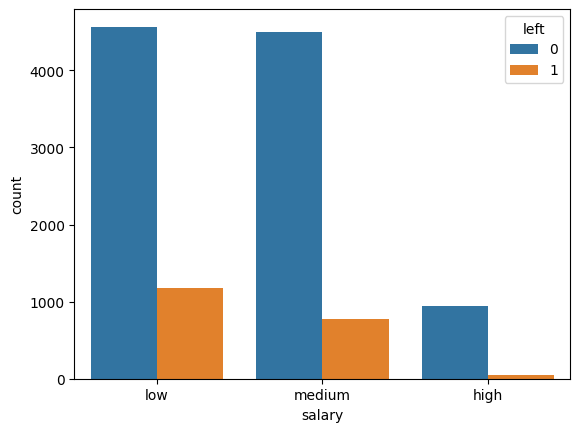

In [ ]:
sns.countplot(data=df,x=df['salary'],hue=df['left'])

People with low and medium salary are showing high attrion rate

In [ ]:
for col in df['salary'].unique():
  print('Attrition rate for',col,'salary is:')
  print(round(len(df[(df['salary']==col) & (df['left']==1)])/len(df[df['salary']==col])*100,2))
  print("---------------------------------------")

Attrition rate for low salary is:
20.45
---------------------------------------
Attrition rate for medium salary is:
14.62
---------------------------------------
Attrition rate for high salary is:
4.85
---------------------------------------
